In [1]:
# Import dependencies
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import bayesian_bootstrap.bootstrap as bb
from scipy import stats
from astropy.utils import NumpyRNGContext

In [2]:
# Styling plots
sns.set(style='dark', palette='colorblind', font_scale=1.3,
        rc={'figure.figsize':(12,9), 
            "axes.facecolor": (0, 0, 0, 0)})

In [3]:
# Read in data which I already downloaded from FoxSports and semi-cleaned in Excel
data_df = pd.read_excel('KelceMahomes.xlsx')
data_df

,Game,Game_Outcome,Targets,Receptions,Yards,RecTD,Long
0,Game 103,CIN W,8,7,78,1,16
1,Game 102,JAX W,17,14,98,2,15
2,Game 101,@LV W,7,6,38,0,15
3,Game 100,DEN W,10,7,43,0,12
4,Game 99,SEA W,8,6,113,0,52
...,...,...,...,...,...,...,...
98,Game 5,@PIT W,10,7,109,2,31
99,Game 4,@LAC W,6,1,6,0,6
100,Game 3,@CHI L,2,2,29,0,26
101,Game 2,@ATL W,3,2,27,0,14


In [5]:
# Drop unnecessary columns
data_df = data_df.drop(columns=["Game_Outcome","Targets","Receptions","Yards","RecTD"])

data_df

,Game,Long
0,Game 103,16
1,Game 102,15
2,Game 101,15
3,Game 100,12
4,Game 99,52
...,...,...
98,Game 5,31
99,Game 4,6
100,Game 3,26
101,Game 2,14


In [9]:
# Setting the seed
with NumpyRNGContext(7):
    kelce_bootstrap = bb.mean(data_df.Long, n_replications=10000)

In [10]:
# Checking samples of the bootstrapped mean
kelce_bootstrap[:5]

[24.39326795482142,
 22.245536725115713,
 24.62504596916196,
 24.43611908102217,
 24.587292506074704]

In [11]:
# Checking that sample length is 10000
len(kelce_bootstrap)

10000

C:\Users\Alex\anaconda3\envs\mlenv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


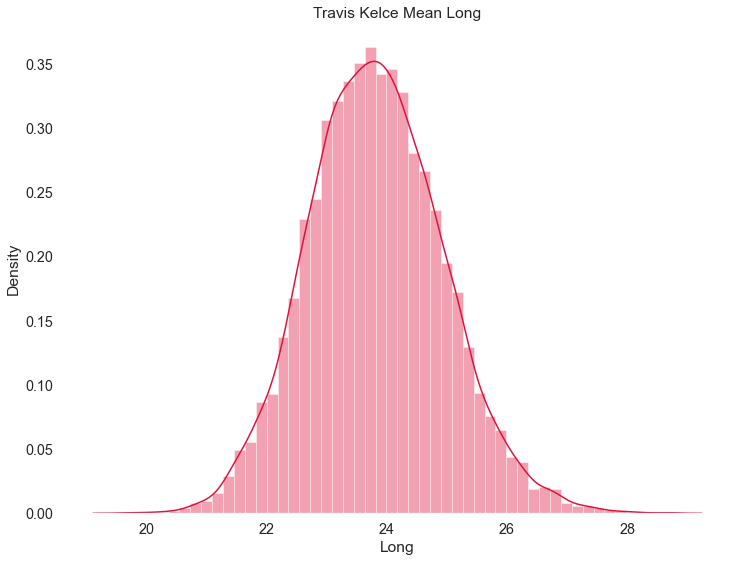

In [17]:
# Plotting the sample means

ax = sns.distplot(kelce_bootstrap, color='crimson')
ax.set(xlabel='Long', ylabel='Density', title='Travis Kelce Mean Long')
sns.despine();

In [15]:
# Finding the median of the bootstrapped samples

np.median(kelce_bootstrap)

23.789293171091586

In [18]:
# Checking confidence interval of the median on the dataset to make sure the median of bootstrapped means isn't out of line
from scipy.stats import bootstrap

In [19]:
data = (data_df.Long,)

In [20]:
bootstrap_ci = bootstrap(data, np.median, confidence_level=0.95,
                        random_state=1, method='percentile')

In [21]:
print(bootstrap_ci.confidence_interval)

ConfidenceInterval(low=19.0, high=25.0)
